In [33]:
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

## Keras

케라스는 tensorflow를 계산 엔진으로 사용하는 파이썬 패키지이다. 신경망 구성순서는 다음과 같다.
1. Sequential 모형 클래스 객체 생성
2. add 매서드로 layer 추가
    - Dense layer 가 가장 일반적인 신경망이다
    - 입력단부터 순차적으로 추가한다.
    - 레이어는 출력 뉴런 갯수를 첫번째 인수로 받는다.
    - 최초의 레이어는 input_dim 인수로 입력 크기를 설정해야한다.
    - activate 인수로 activate 함수설정
3. complie 매서드로 모형완성
    - loss 인수로 loss 함수 설정
    - optimizer 인수로 최적화 알고림즘 서렂ㅇ
    - me†rics 인수로 트레이닝 단계에서 기록할 성능 기준 설정
4. fit 매서드로 트레이닝
    - epochs (nb_epoch) 로 epoch 횟수 설정
    - batch_size를 통해 mini batch size 설정
    - mertrics 인수로 설정 기준 기록을 출력으로 변환
    - jupyter notebook 을 사용한다면 verbose =2 로 설정하여 progress bar가 나오지 않도록 설정한다.

__Keras.models.Seqeuntial__

이 class는 wrapper 역할을 해줍니다. 신경망 구조에서 layer의 sequence를 하나의 networks로 다루게 해줍니다.
<br>

__Keras.datasets__

케라스의 기본 데이터샘플입니다.

In [29]:
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
print(X_train0.shape, X_test0.shape)

(60000, 28, 28) (10000, 28, 28)


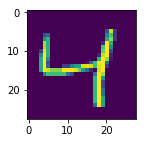

In [30]:
plt.figure(figsize=(2,2))
plt.imshow(X_train0[2])
plt.show()

In [31]:
# change data type and Scaling
X_train = X_train0.reshape(60000, 784).astype('float32') /255.0
X_test = X_test0.reshape(10000, 784).astype('float32') /255.0
print( X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [32]:
# one_hot encoding

Y_train = np_utils.to_categorical(y_train0,10)
Y_test = np_utils.to_categorical(y_test0,10)
Y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

####  layer 설계

케라스에서 NN networks layers에 대한 인터페이스 제공은 다양합니다. fully connected layers, max pool layers, activate layers 등등 사용이 가능하며, __add()__ 함수를 통해 추가가 가능합니다.

In [37]:
np.random.seed(0)

# Create the Sequential model
model = Sequential()

# addd layers

model.add(Dense(15, input_dim = X_train.shape[1], activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Fitting the model
history = model.fit(X_train, Y_train, epochs=30, batch_size=100, \
                    validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 0.0263 - acc: 0.8821 - val_loss: 0.0253 - val_acc: 0.8880
Epoch 2/30
 - 1s - loss: 0.0258 - acc: 0.8834 - val_loss: 0.0248 - val_acc: 0.8905
Epoch 3/30
 - 1s - loss: 0.0253 - acc: 0.8851 - val_loss: 0.0243 - val_acc: 0.8909
Epoch 4/30
 - 1s - loss: 0.0249 - acc: 0.8866 - val_loss: 0.0239 - val_acc: 0.8922
Epoch 5/30
 - 1s - loss: 0.0244 - acc: 0.8878 - val_loss: 0.0234 - val_acc: 0.8940
Epoch 6/30
 - 1s - loss: 0.0240 - acc: 0.8893 - val_loss: 0.0231 - val_acc: 0.8946
Epoch 7/30
 - 1s - loss: 0.0236 - acc: 0.8904 - val_loss: 0.0227 - val_acc: 0.8961
Epoch 8/30
 - 1s - loss: 0.0233 - acc: 0.8915 - val_loss: 0.0224 - val_acc: 0.8966
Epoch 9/30
 - 1s - loss: 0.0229 - acc: 0.8925 - val_loss: 0.0220 - val_acc: 0.8980
Epoch 10/30
 - 1s - loss: 0.0226 - acc: 0.8932 - val_loss: 0.0217 - val_acc: 0.8994
Epoch 11/30
 - 1s - loss: 0.0223 - acc: 0.8943 - val_loss: 0.0214 - val_acc: 0.9002
Epoch 12/30
 - 1s - loss: 0.0220 - 

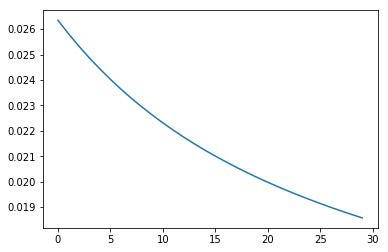

In [43]:
plt.plot(history.history['loss'])

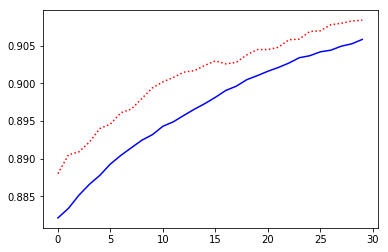

In [44]:
plt.plot(history.history['acc'], 'b-', label="training")
plt.plot(history.history['val_acc'], 'r:', label="test")
plt.show()

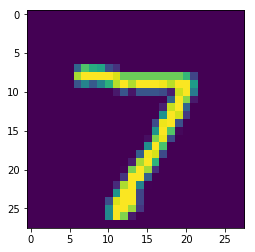

In [50]:
plt.imshow(X_test0[0])

In [52]:
model.predict(X_test[:1,:])

array([[0.00682016, 0.00597485, 0.00914746, 0.0222273 , 0.0048939 ,
        0.03155379, 0.00646906, 0.96634233, 0.00233015, 0.01812094]],
      dtype=float32)

In [53]:
model.predict_classes(X_test[:1,:])

array([7])